# Introdução

Utilizaremos um conjunto de dados, um dataset chamado Fashion-MNIST, organizado com imagens de várias roupas diferentes, e foi feito pelo grupo de pesquisa denominado Zalando Research. Além disso, faremos nosso código com a biblioteca do Google especializada em Redes Neurais Profundas chamada TensorGlow, como a nossa camada de mais baixo nível para comunicação com uma máquina.

Depois, escreveremos a maior parte do código usando Keras, API alto nível que está acima do TensorFlow, e faremos tudo isso usando a linguagem Python. Importaremos estas bibliotecas, carregar nosso dataset, explorar e exibir nossos dados, fazer um gráfico, também iremos normalizar esta imagem, criar, compilar, treinar e salvar nosso modelo. Visualizaremos a acurácia, a perda, e entender o que é isso durante o curso, saber se o modelo está indo bem, ou não, ajustá-lo, testá-lo e avaliá-lo.

Com isso começaremos a entender o que é este mundo de Deep Learning, e como nos locomovemos em todas estas probabilidades que não são tão exatas como gostaríamos.

Ver também: <https://github.com/zalandoresearch/fashion-mnist>

# 1.Conhecendo o conjunto de dados 
Disponível em: <http://yann.lecun.com/exdb/mnist/>

In [ ]:
#Importar bibliotecas
import tensorflow
from tensorflow  import keras
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

#Criar base de dados
dataset=keras.datasets.fashion_mnist
((imagens_treino,rotulos_treino),(imagens_teste,rotulos_teste))=dataset.load_data()

In [ ]:
#Tamanho do dataset
print('Imagens de treino:',len(imagens_treino),'|Com dimensão de:',imagens_treino.shape)
print('Imagens de teste :',len(imagens_teste),'|Com dimensão de:',imagens_treino.shape)

Imagens de treino: 60000 |Com dimensão de: (60000, 28, 28)
Imagens de teste : 10000 |Com dimensão de: (60000, 28, 28)


Text(0.5, 1.0, '9')

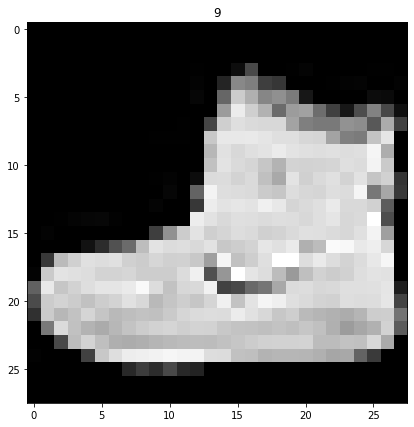

In [ ]:
#Visulizar imagem
plt.rcParams['figure.figsize'] = (11,7)

plt.imshow(imagens_treino[0],cmap='gray')
plt.title(rotulos_treino[0])

 # 2.Começando a montar o modelo

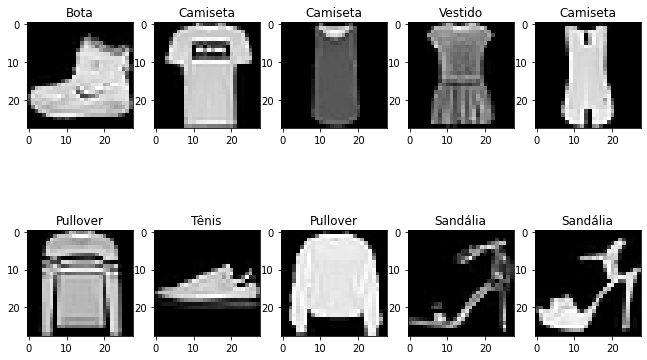

In [ ]:
#Associar código ao objeto
nomes_rotulos=['Camiseta','Calça','Pullover','Vestido','Casaco','Sandália','Camisa','Tênis','Bolsa','Bota']
for imagem in range (len(nomes_rotulos)):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem],cmap='gray')
  plt.title(nomes_rotulos[rotulos_treino[imagem]])

In [ ]:
#Sequência do modelo
print('modelo = entrada-> processamento-> saída')
print('entrada = imagens')
modelo=keras.Sequential([keras.layers.Flatten(input_shape=(28,28))])


modelo = entrada-> processamento-> saída
entrada = imagens


Se considerarmos 1px deste tamanho para esta imagem que vemos, conseguimos incluir 4px dentro dela, então dividimos esta imagem em 4px. Mas do mesmo modo que tínhamos 28 x 28, podemos ler esses 4px de outra forma, que são 2px para a nossa linha, e 2x para a coluna.

Repare que quando chamamos esta imagem de 2 x 2px, estamos tendo uma imagem de 2 dimensões, linhas e colunas. O que podemos fazer nesta primeira camada que chamamos de camada 0 é pegar esses 2 x 2px e, por exemplo, ter uma função para lidar com cada pixel. Então, teríamos 4 unidades, 1 para cada pixel, e o que elas farão é reordenar e reagrupar estes pixels. Então, em vez de termos 2 dimensões, 2 linhas e 2 colunas, teremos 1 linha e 4 colunas, assim temos 1 dimensão com 4 pixels.

É isso que faremos em nossa primeira camada, que é a que chamamos de camada 0. Essa é a nossa entrada. Voltaremos ao Notebook, e sabemos que em nossa entrada iremos lidar com imagens que temos no dataset, e elas não tinham 2 x 2 pixels, e sim 28 x 28 px. Esses números, que iremos agrupar entre parênteses e com uma vírgula entre eles, são as dimensões que vimos na forma da nossa imagem.

Ver também: <http://scipy-lectures.org/advanced/image_processing/>

# 3.Adicionando camadas ocultas

* Criar modelo

In [ ]:
#Tamanho das imagens
tamanho_imagem=(28,28)
#Função de ativação
funcao_ativacao=tensorflow.nn.relu
#N° de saídas
saidas=10
#Função de probabilidade de saída 
funcao_prob= tensorflow.nn.softmax

modelo_1=keras.Sequential([
                         keras.layers.Flatten(input_shape=tamanho_imagem),      #Entrada (Camada 0)
                         keras.layers.Dense(256,activation=funcao_ativacao),    #Processamento (Camada 1)
                         keras.layers.Dense(saidas,activation=funcao_prob)])    #Saída (Camada 2)


# 4.Ensinando o modelo

In [ ]:
modelo_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
modelo_1.fit(imagens_treino,rotulos_treino)

1875/1875 [==============================] - 5s 3ms/step - loss: 4.0042


* Reduzindo perdas

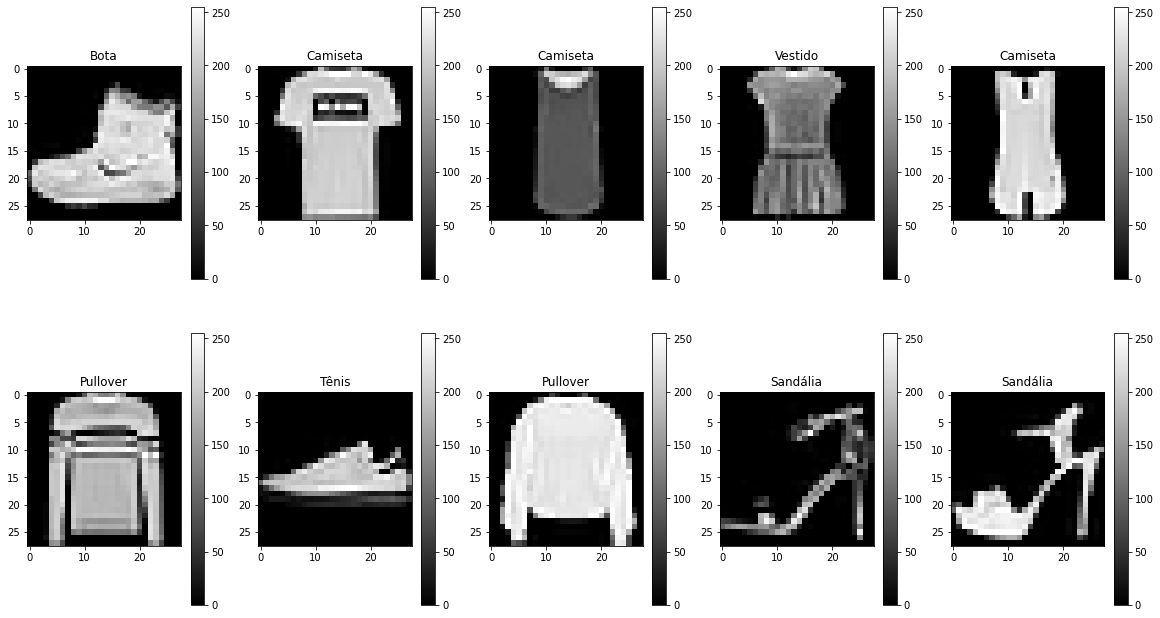

In [ ]:
#Escala de cinza
nomes_rotulos=['Camiseta','Calça','Pullover','Vestido','Casaco','Sandália','Camisa','Tênis','Bolsa','Bota']

plt.rcParams['figure.figsize'] = (20,11)
for imagem in range (len(nomes_rotulos)):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem],cmap='gray')
  plt.title(nomes_rotulos[rotulos_treino[imagem]])
  plt.colorbar()

* Modelo como dataset alterado

In [ ]:
#Normalizar imagens (redução de escala)
imagens_treino= imagens_treino/float(255)

#Tamanho das imagens
tamanho_imagem=(28,28)
#Função de ativação
funcao_ativacao=tensorflow.nn.relu
#N° de saídas
saidas=10
#Função de probabilidade de saída 
funcao_prob= tensorflow.nn.softmax

modelo_2=keras.Sequential([
                         keras.layers.Flatten(input_shape=tamanho_imagem),      #Entrada (Camada 0)  
                         keras.layers.Dense(256,activation=funcao_ativacao),    #Processamento (Camada 1)
                         keras.layers.Dense(128,activation=funcao_ativacao),    #Processamento (Camada 2) 
                         keras.layers.Dense(64,activation=funcao_ativacao),     #Processamento (Camada 3) 
                         keras.layers.Dense(saidas,activation=funcao_prob)])    #Saída (Camada 4) 
#Treinar modelo
modelo_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
modelo_2.fit(imagens_treino,rotulos_treino)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4823


Mais camadas não necessarimente melhoram o modelo

In [ ]:
#Tamanho das imagens
tamanho_imagem=(28,28)
#Função de ativação
funcao_ativacao=tensorflow.nn.relu
#N° de saídas
saidas=10
#Função de probabilidade de saída 
funcao_prob= tensorflow.nn.softmax

modelo_3=keras.Sequential([
                         keras.layers.Flatten(input_shape=tamanho_imagem),      #Entrada (Camada 0)  
                         keras.layers.Dense(256,activation=funcao_ativacao),    #Processamento (Camada 1)
                         keras.layers.Dense(saidas,activation=funcao_prob)])    #Saída (Camada 2) 
#Treinar modelo
modelo_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
modelo_3.fit(imagens_treino,rotulos_treino)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.4841


# 5.Medir o resultado do modelo

* Modelo que em avaliação

In [ ]:
#Tamanho das imagens
tamanho_imagem=(28,28)
#Função de ativação
funcao_ativacao=tensorflow.nn.relu
#N° de saídas
saidas=10
#Função de probabilidade de saída 
funcao_prob= tensorflow.nn.softmax

modelo_4=keras.Sequential([
                         keras.layers.Flatten(input_shape=tamanho_imagem),      #Entrada (Camada 0)  
                         keras.layers.Dense(256,activation=funcao_ativacao),    #Processamento (Camada 1)
                         keras.layers.Dense(saidas,activation=funcao_prob)])    #Saída (Camada 2) 
#Treinar modelo
modelo_4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
historico=modelo_4.fit(imagens_treino,rotulos_treino,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5073 - accuracy: 0.8200 - val_loss: 0.3929 - val_accuracy: 0.8602
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3781 - accuracy: 0.8633 - val_loss: 0.3588 - val_accuracy: 0.8711
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3370 - accuracy: 0.8770 - val_loss: 0.3915 - val_accuracy: 0.8564
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3121 - accuracy: 0.8840 - val_loss: 0.4136 - val_accuracy: 0.8573
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2907 - accuracy: 0.8929 - val_loss: 0.3244 - val_accuracy: 0.8848
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2757 - accuracy: 0.8986 - val_loss: 0.3234 - val_accuracy: 0.8858
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2631 - accuracy: 0.9008 - val_loss: 0.3092 - val_accuracy:

* Modelo em fase de teste

In [ ]:
testes=modelo_4.predict(imagens_teste)
print('Resultado predito:',np.argmax(testes[0]))
print('Rotulo real      :',rotulos_teste[0])

Resultado predito: 9
Rotulo real      : 9


In [ ]:
# Avaliação de acurácia 
perda_teste,acuracia_teste=modelo_4.evaluate(imagens_teste,rotulos_teste)
print('Perda do teste    :',round(perda_teste,2))
print('Acurácia do teste :',round(acuracia_teste,2))

313/313 [==============================] - 1s 2ms/step - loss: 82.9978 - accuracy: 0.8616
Perda do teste    : 83.0
Acurácia do teste : 0.86


# 6.Ajustando e salvando o modelo

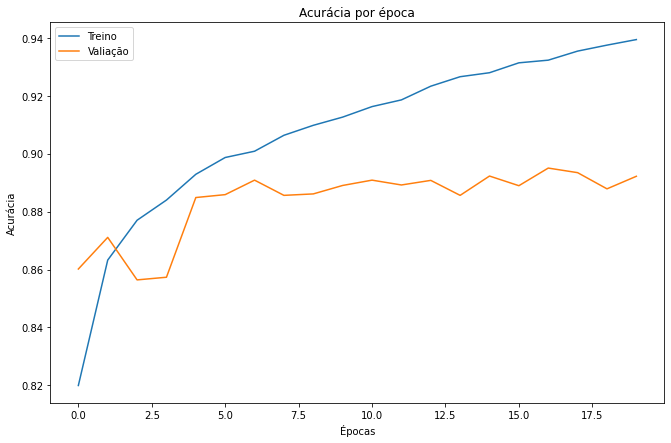

In [ ]:
plt.rcParams['figure.figsize'] = (11,7)

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino','Valiação'])

Com 10 épocas ou mais, a curva de validação na qual o erro aumenta cada vez mais e na curva de treino que ele apenas reduz. Isso indica que nosso modelo está perdendo pouquíssima informação no treino e muita na validação. O que mostra que ele está servindo bem demais o modelo, overfitting. 

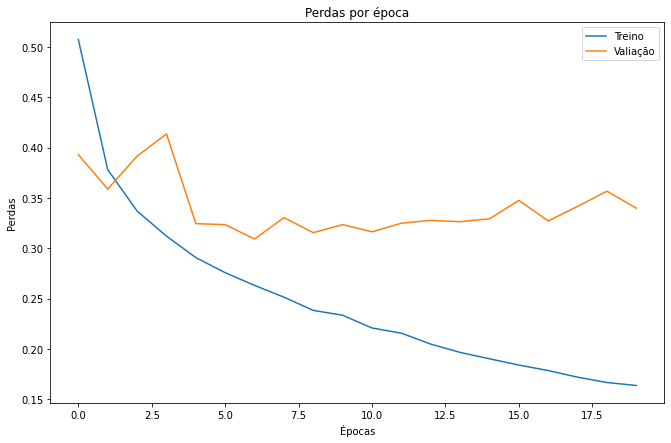

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por época')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino','Valiação'])

* Eventualmente modelo está bem ajustado para os dados de treino mas não para os dados de teste

* Modelo não totalmente interligado

In [ ]:
#Tamanho das imagens
tamanho_imagem=(28,28)
#Função de ativação
funcao_ativacao=tensorflow.nn.relu
#N° de saídas
saidas=10
#Função de probabilidade de saída 
funcao_prob= tensorflow.nn.softmax

modelo_5=keras.Sequential([
                         keras.layers.Flatten(input_shape=tamanho_imagem),      #Entrada (Camada 0)  
                         keras.layers.Dense(256,activation=funcao_ativacao),    #Processamento (Camada 1)
                         keras.layers.Dropout(0.2),                             #Processamento (Camada 2)
                         keras.layers.Dense(saidas,activation=funcao_prob)])    #Saída (Camada 3) 
#Treinar modelo
modelo_5.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
historico=modelo_5.fit(imagens_treino,rotulos_treino,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5220 - accuracy: 0.8155 - val_loss: 0.4021 - val_accuracy: 0.8564
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3982 - accuracy: 0.8536 - val_loss: 0.3675 - val_accuracy: 0.8671
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3606 - accuracy: 0.8668 - val_loss: 0.3424 - val_accuracy: 0.8753
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3411 - accuracy: 0.8750 - val_loss: 0.3430 - val_accuracy: 0.8781
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3232 - accuracy: 0.8802 - val_loss: 0.3601 - val_accuracy: 0.8696


In [ ]:
# Avaliação de acurácia 
perda_teste,acuracia_teste=modelo_5.evaluate(imagens_teste,rotulos_teste)
print('Perda do teste    :',round(perda_teste,2))
print('Acurácia do teste :',round(acuracia_teste,2))

313/313 [==============================] - 1s 2ms/step - loss: 48.6316 - accuracy: 0.8520
Perda do teste    : 48.63
Acurácia do teste : 0.85


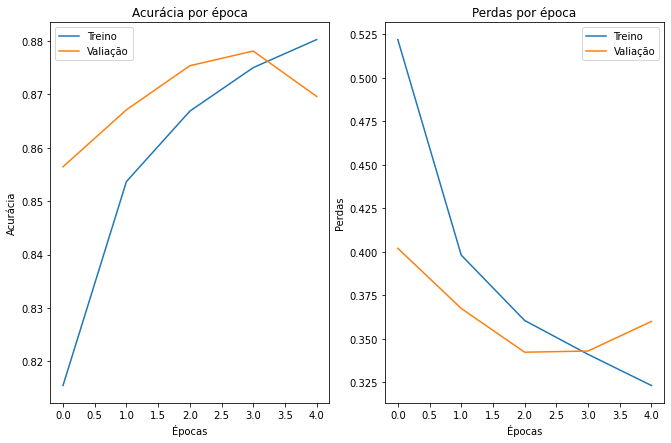

In [ ]:
plt.rcParams['figure.figsize'] = (11,7)
#Acurácia 
plt.subplot(121)
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino','Valiação'])
#Perda 
plt.subplot(122)
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por época')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino','Valiação'])

In [ ]:
# Salvar modelo
modelo_5.save('modelo.h5')

In [ ]:
# Carregar modelo salvo 
from tensorflow.keras.models import load_model
modelo_salvo=load_model('modelo.h5')